# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 1493


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # print(i)
    # print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #f"{url}appid={api_key}&q={city}&units={units}"
    city_url = f"{url}lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}&units=metric"
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Noticed not all countries have country key field and value under sys, which was reducing the amount of data collected
        # if "country" in city_weather["sys"].keys():
        #     city_country = city_weather["sys"]["country"]
        # else:
        #     city_country = ""

        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
City not found. Skipping...
Processing Record 2 of Set 1 | st. john's
City not found. Skipping...
Processing Record 3 of Set 1 | west island
City not found. Skipping...
Processing Record 4 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 5 of Set 1 | east london
City not found. Skipping...
Processing Record 6 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 7 of Set 1 | dryden
Processing Record 8 of Set 1 | tsiombe
City not found. Skipping...
Processing Record 9 of Set 1 | khandyga
City not found. Skipping...
Processing Record 10 of Set 1 | hasaki
City not found. Skipping...
Processing Record 11 of Set 1 | bubaque
City not found. Skipping...
Processing Record 12 of Set 1 | olonkinbyen
City not found. Skipping...
Processing Record 13 of Set 1 | fort bragg
City not found. Skipping...
Processing Record 14 of Set 1 | forster
City not found. Ski

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          385
Lat           385
Lng           385
Max Temp      385
Humidity      385
Cloudiness    385
Wind Speed    385
Country       385
Date          385
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dryden,49.8600,-93.5115,5.61,55,3,3.05,CA,1713146956
1,nova vicosa,24.7773,9.8506,17.90,11,100,2.91,LY,1713146957
2,bredasdorp,65.1555,-147.8868,0.29,79,100,3.29,US,1713146958
3,isafjordur,26.9263,-113.0168,20.18,39,93,9.14,MX,1713146958
4,chonchi,65.3386,-110.8638,-6.94,94,100,4.81,CA,1713146960


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.8600,-93.5115,5.61,55,3,3.05,CA,1713146956
1,nova vicosa,24.7773,9.8506,17.90,11,100,2.91,LY,1713146957
2,bredasdorp,65.1555,-147.8868,0.29,79,100,3.29,US,1713146958
3,isafjordur,26.9263,-113.0168,20.18,39,93,9.14,MX,1713146958
4,chonchi,65.3386,-110.8638,-6.94,94,100,4.81,CA,1713146960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

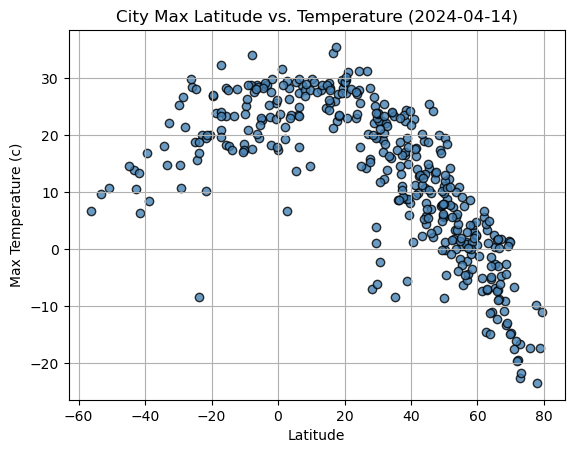

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df ["Lat"], city_data_df["Max Temp"], c="steelblue", edgecolors='black',
            linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-14)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

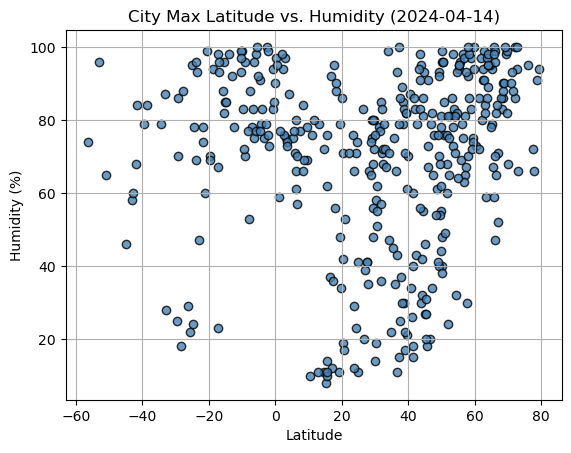

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df ["Lat"], city_data_df["Humidity"], marker="o", c="steelblue", edgecolors='black', 
            label="Cities", alpha=0.8, linewidths=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-04-14)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# # Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

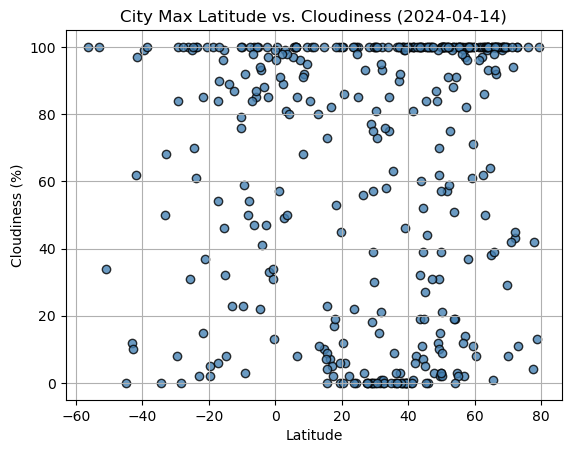

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ["Lat"], city_data_df["Cloudiness"], marker="o", c="steelblue", edgecolors='black',
            label="Cities", alpha=0.8, linewidths=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-04-14)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

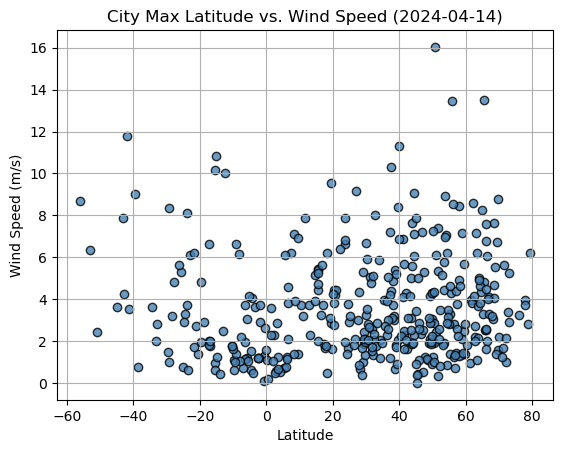

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df ["Lat"], city_data_df["Wind Speed"], marker="o", c="steelblue", edgecolors='black',
            label="Cities", alpha=0.8, linewidths=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-04-14)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope +intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return line_eq


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.8600,-93.5115,5.61,55,3,3.05,CA,1713146956
1,nova vicosa,24.7773,9.8506,17.90,11,100,2.91,LY,1713146957
2,bredasdorp,65.1555,-147.8868,0.29,79,100,3.29,US,1713146958
3,isafjordur,26.9263,-113.0168,20.18,39,93,9.14,MX,1713146958
4,chonchi,65.3386,-110.8638,-6.94,94,100,4.81,CA,1713146960


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
20,tamanrasset,-25.7761,138.6516,28.43,22,31,5.28,AU,1713146967
28,bardai,-5.7530,27.5214,19.42,98,85,1.18,CD,1713146971
36,tofol,-6.3510,154.5946,28.80,75,100,1.14,PG,1713146975
40,huarmey,-4.2243,101.8935,28.51,79,93,4.07,ID,1713146978
47,badger,-0.5992,-61.9037,25.62,83,31,1.30,BR,1713147454


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7078618192099215


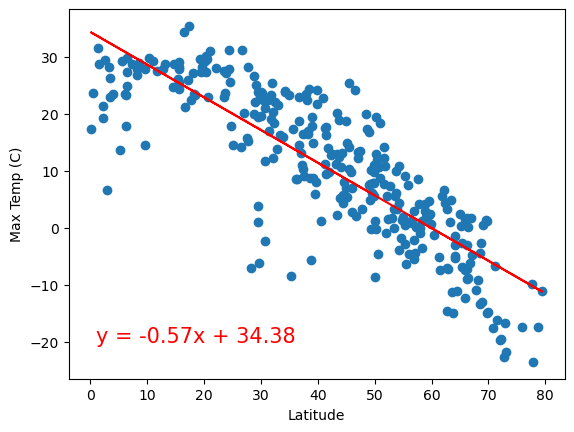

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(1, -20, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.3597113820148917


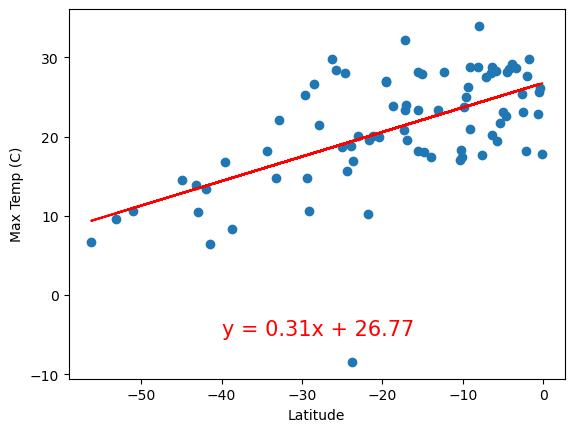

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(-40, -5, plot_linear_regression(x_values, y_values), color="red", fontsize=15)

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
- There is a negative relationship between temp and lat in the northern hemisphere as you move closer to the North Pole it gets colder.
- There is postive relationship between temp and lat in the southern hemisphere as you move closer to the equator it gets warmer and colder as you move towards the South Pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10198136041158357


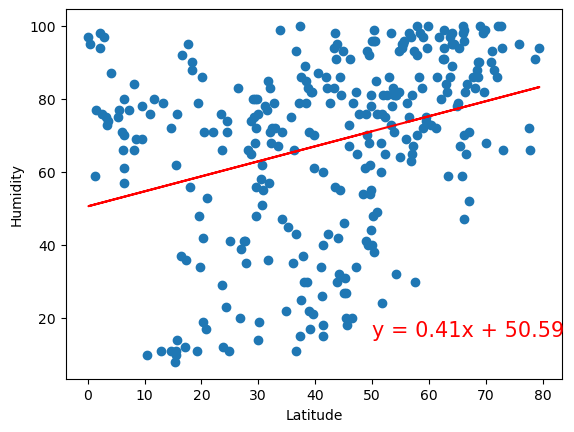

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(50, 15, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.11744020124930611


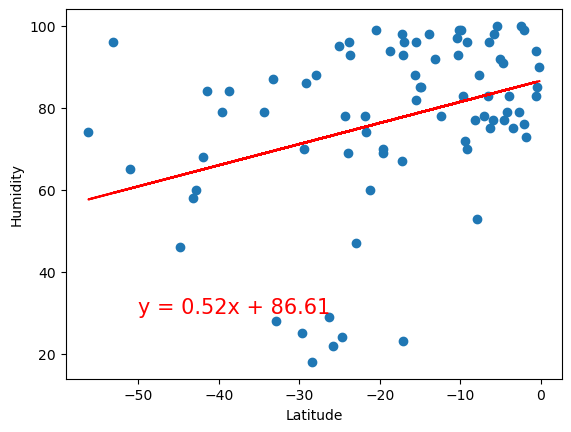

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(-50, 30, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
- There is a postive relationship between humidity and lat in the northern hemisphere as you move away from the equator it gets humid.
- There is postive relationship between humidity and lat in the southern hemisphere as you move closer to the equator it gets humid
- In conclusion, the Norther hemisphere is more humid compared to the Souther hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02036013002017518


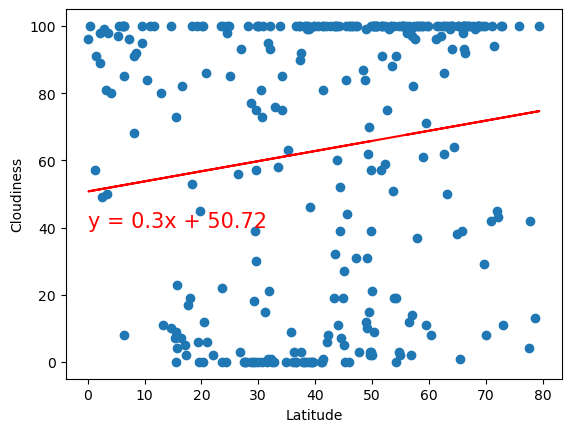

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(0, 40, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.008442821521299748


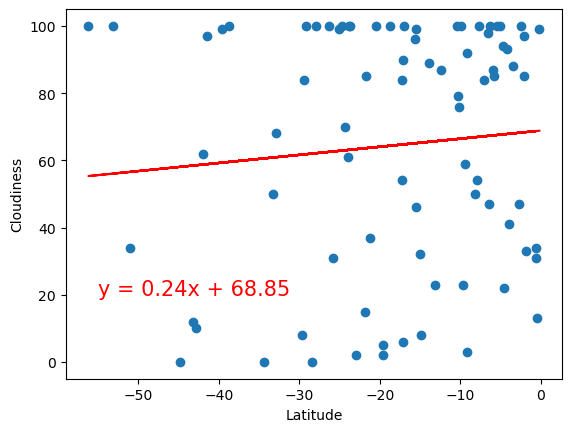

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(-55, 20, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
- There is a postive relationship between cloudiness and lat in the northern hemisphere as you move away from the equator it gets cloudier.
- There is postive relationship between cloudiness and lat in the southern hemisphere as you move closer to the equator it gets cloudier.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015013409461080509


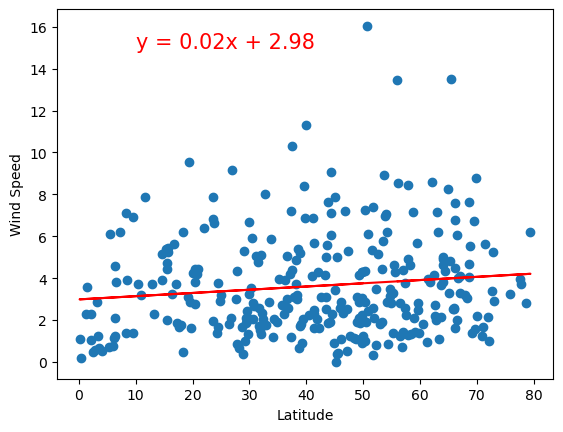

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(10, 15, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.16554392271612048


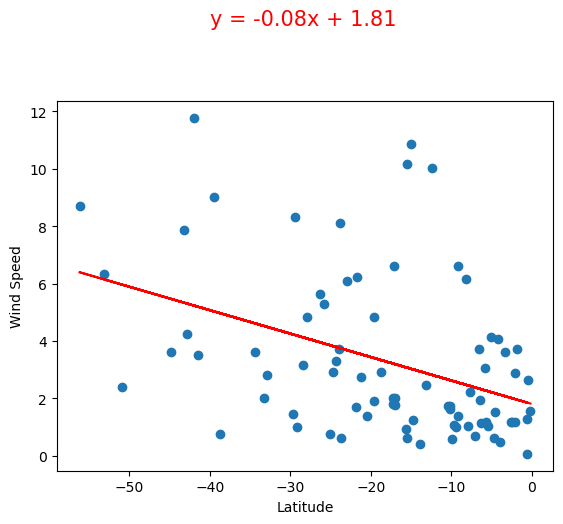

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
lat_values = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, lat_values, "r-")
plt.text(-40, 15, plot_linear_regression(x_values, y_values), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
- There is a slight postive relationship between wind speed and lat in the northern hemisphere as you move away from the equator it gets winder.
- There is slight negative relationship between wind speed and lat in the southern hemisphere as you move closer to the equator it gets less wind and winder closer to the South Pole.